In [36]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
import PIL 
from scipy import misc
from sklearn.tree import export_graphviz
from scipy.stats import stats
import scipy.misc
from scipy.ndimage import imread

%matplotlib inline

In [53]:
data = pd.read_csv('DataNew.csv')

In [54]:
type(data)

pandas.core.frame.DataFrame

In [55]:
data.describe()

,correct,playedInterval,answeredInterval,firstNote,expectedNote,inputNote,time
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,0.626426,4.643536,4.182034,21.436312,21.550856,21.219106,7.393434
std,0.483868,3.115517,3.160569,11.547241,11.289569,11.879767,24.473240
min,0.000000,1.000000,-1.000000,3.000000,3.000000,0.000000,0.083252
25%,0.000000,2.000000,2.000000,12.000000,12.000000,11.000000,2.083923
50%,1.000000,4.000000,4.000000,21.000000,22.000000,21.000000,4.199684
75%,1.000000,7.000000,6.000000,32.000000,32.000000,32.000000,8.558670
max,1.000000,11.000000,11.000000,41.000000,41.000000,41.000000,1080.473999


In [56]:
data.head()

,correct,playedInterval,answeredInterval,firstNote,expectedNote,inputNote,time
0,0,1,2,3,9,17,7.798172
1,0,2,1,4,15,18,4.357033
2,0,2,2,4,16,19,12.062160
3,1,2,2,5,9,9,1.756146
4,0,1,1,6,4,19,4.740744


In [61]:
data.info

<bound method DataFrame.info of       correct  playedInterval  answeredInterval  firstNote  expectedNote  \
0           0               1                 2          3             9   
1           0               2                 1          4            15   
2           0               2                 2          4            16   
3           1               2                 2          5             9   
4           0               1                 1          6             4   
5           0               1                 2          7            20   
6           0               1                 2          8            22   
7           0               1                 2          9            14   
8           0               2                 1         10            18   
9           0               2                -1         10            18   
10          0               1                 1         11            24   
11          1               1                 1         

In [57]:
train, test = train_test_split(data, test_size = 0.15)

In [58]:
print("Training size: {}; test_size: {}". format(len(train), len(test)))

Training size: 1788; test_size: 316


In [59]:
train.shape

(1788, 7)

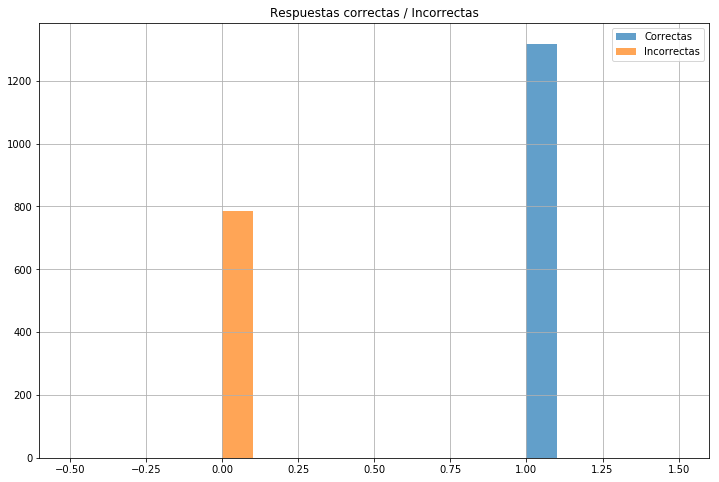

In [60]:
pos_temp = data[data['correct'] == 1]['correct']
neg_temp = data[data['correct'] == 0]['correct']

fig = plt.figure(figsize=(12, 8))
plt.title("Respuestas correctas / Incorrectas")
pos_temp.hist(alpha = 0.7, bins = 10, label = 'Correctas')
neg_temp.hist(alpha = 0.7, bins = 10, label = 'Incorrectas')
plt.legend(loc = "upper right")

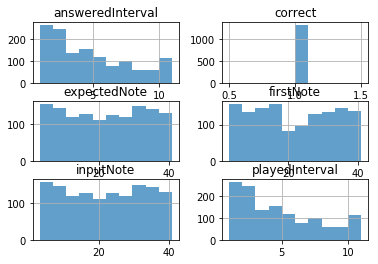

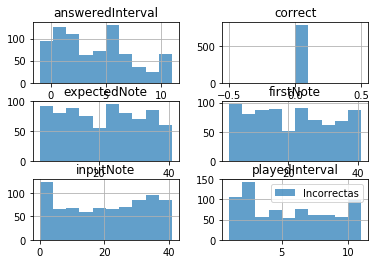

In [45]:
pos_temp = data[data['correct'] == 1]
neg_temp = data[data['correct'] == 0]

fig = plt.figure(figsize=(12, 8))
pos_temp.hist(alpha = 0.7, bins = 10, label = 'Correctas')
neg_temp.hist(alpha = 0.7, bins = 10, label = 'Incorrectas')
plt.legend(loc = "upper right")

In [46]:
c = DecisionTreeClassifier(min_samples_split = 100)

In [47]:
features = ["correct", "playedInterval", "answeredInterval", "firstNote", "expectedNote", "inputNote", "time"]

In [48]:
x_train = train[features]
y_train = train["correct"]

x_test = train[features]
y_test = train["correct"]

In [49]:
y_test

468     1
1899    0
1920    1
345     0
1358    0
833     0
177     1
1118    1
276     0
1898    0
767     0
459     1
1183    0
2002    1
1632    1
649     1
1171    1
1041    1
1799    1
297     0
1111    1
511     0
1739    1
846     0
953     0
1644    0
1684    1
152     0
1856    1
1633    0
       ..
1679    1
964     0
1997    1
1198    1
1712    1
712     0
586     1
1195    1
362     1
578     1
366     1
763     1
1025    1
805     1
166     0
124     1
1543    1
762     0
1791    1
373     1
146     0
1460    0
1092    1
1550    1
660     1
752     1
657     1
901     0
1034    1
387     1
Name: correct, Length: 1788, dtype: int64

In [50]:
dt = c.fit(x_train, y_train)

      correct  playedInterval  answeredInterval  firstNote  expectedNote  \
468         1               2                 2         20            10   
1899        0               2                 1          7            34   
1920        1               4                 4          4             7   
345         0               3                 2         40            32   
1358        0               2                 3         10            20   
833         0               1                 2         25            35   
177         1               4                 4         40            23   
1118        1               9                 9         30            36   
276         0               6                 8         33             3   
1898        0               6                 5         33            22   
767         0               2                 1         28            14   
459         1               7                 7          6            15   
1183        

In [51]:
import imageio
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20, 20)
    plt.imshow(img)

In [52]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

show_tree(dt, features, 'dec_tree_01.png')

RuntimeError: Imageio Pillow plugin requires Pillow lib.